In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [118]:
df=pd.read_csv('DataSet/Churn_Modelling.csv')

In [119]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [121]:
df.duplicated().sum()

0

In [122]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [123]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [124]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [125]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [126]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

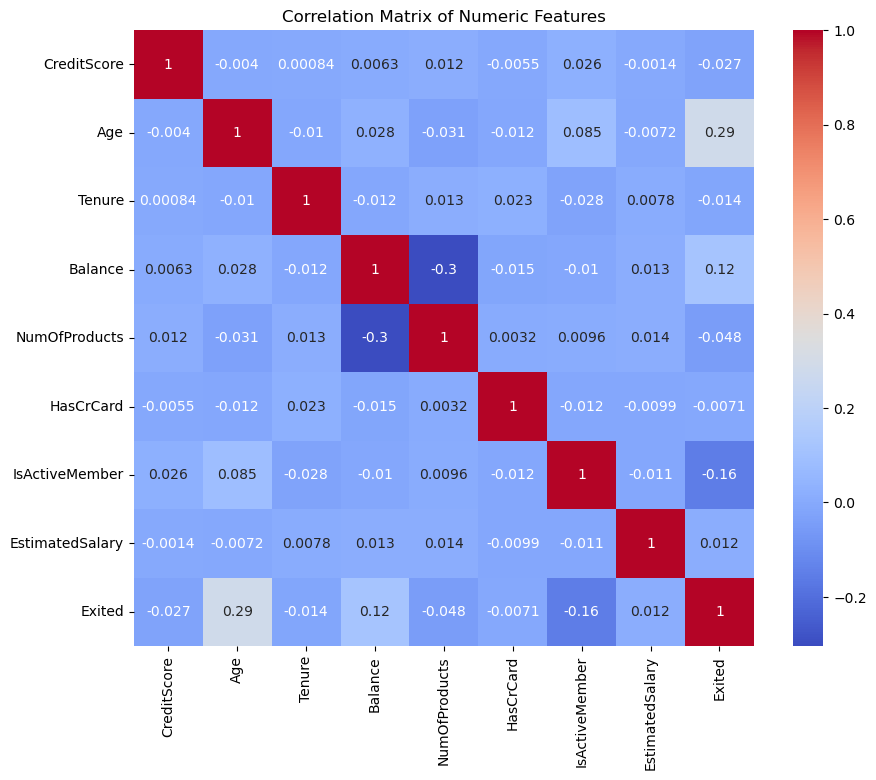

In [127]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [128]:
#Encoding Gender
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

#Encoding Geo
onehot_encoder_geo = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
geo_encoded = onehot_encoder_geo.fit_transform(df[['Geography']])

#Converting to Dataframe and merging it
geo_encoded_df = pd.DataFrame(
    geo_encoded,
    columns=onehot_encoder_geo.get_feature_names_out(['Geography']),
    index=df.index
)
df = pd.concat([df.drop('Geography', axis=1), geo_encoded_df], axis=1)

df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                0.0              0.0  
1               1        112542.58       0                0.0              1.0  
2               0        113931.57       1                0.0              0.0  
3               0         93826.63       0                0.0              0.0  
4               1         79084.10       0                0.0              1.0

In [129]:
#Splitting Data:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), df['Exited'], test_size=0.2, random_state=42)

In [130]:
#Splitting Data:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), df['Exited'], test_size=0.2, random_state=42)

In [131]:
#Splitting Data:
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [132]:
#Scaling:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.36766974,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ...,  1.6612541 ,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.25280688,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ..., -0.1427649 ,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ..., -0.05082558,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.81456811,
         1.72572313, -0.57638802]])

## ANN Implimentation

In [134]:
model = Sequential()
model.add(Dense(96, activation='relu', input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-06 12:21:09.160211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6716 - loss: 2776.9714 - val_accuracy: 0.8035 - val_loss: 1011.9589
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6762 - loss: 1107.8864 - val_accuracy: 0.8035 - val_loss: 361.4994
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6760 - loss: 361.6283 - val_accuracy: 0.7870 - val_loss: 64.9943
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6744 - loss: 91.4550 - val_accuracy: 0.5290 - val_loss: 22.4732
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6766 - loss: 25.3113 - val_accuracy: 0.8035 - val_loss: 18.2147
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6720 - loss: 14.3390 - val_accuracy: 0.4865 - val_loss: 15.1457
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6709 - loss: 11.1544 - val_accuracy: 0.7380 - val_loss: 3.8512
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6730 - loss: 10.0746 

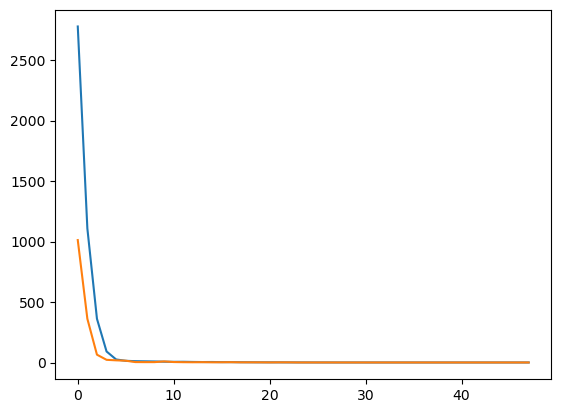

In [135]:
#Plotting Graph:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

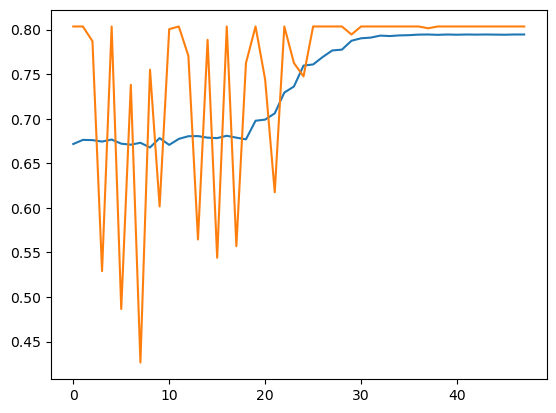

In [136]:
#Plotting Graph:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [138]:
#Saving the Models:
model.save("model.h5")
pickle.dump(onehot_encoder_geo,open('onehot_encoder_geo.pkl','wb'))
pickle.dump(label_encoder_gender,open('label_encoder_gender.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))